<a href="https://colab.research.google.com/github/GreeshmaHarids/Frond_end_models/blob/master/Spam_Detection_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced Spam Detection: Harnessing the Power of NLP and Machine Learning

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/SMS_train (1).csv",encoding='ISO-8859-1')
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df1=pd.read_csv("/content/SMS_test (2).csv",encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


##Preprocessing

In [ ]:
df0=pd.concat([df,df1],axis=0)
df0

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df0.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df0.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df0.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df0['Label'].value_counts()

Label
Non-Spam    884
Spam        198
Name: count, dtype: int64

##EDA

<Axes: xlabel='Label', ylabel='count'>

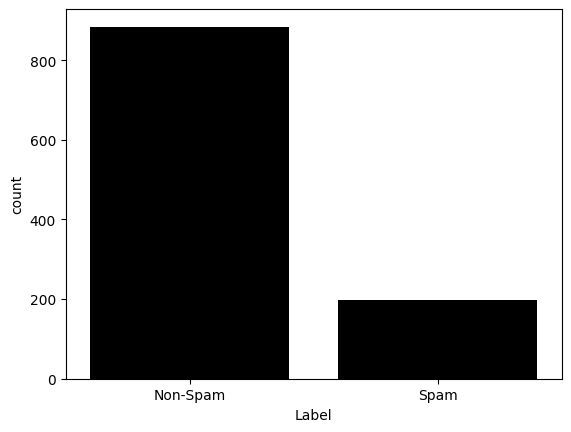

In [ ]:
sns.countplot(x='Label',data=df0,color='k')

In [ ]:
df0.drop(['S. No.'],axis=1)

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


###Labelling into Spam and NON-Spam

In [ ]:
df0['Label']=df0['Label'].map({'Non-Spam':1,'Spam':0})


In [ ]:
df0.dtypes

S. No.           int64
Message_body    object
Label            int64
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
msg=df0.Message_body
msg

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

##Tokenization

---



In [ ]:
#tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
msg=msg.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
msg

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

##Removing Special Characters

---



In [ ]:
#removing special characters
msg=msg.str.replace('[^a-zA-z0-9]+',' ')
msg

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#removing words less than length 3
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
msg

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2       Pity was mood for that ... any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun ... Thk mayb can dun have anythin ... Thk ...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

##Stemming

---



In [ ]:
#stemming
from nltk.stem import SnowballStemmer
sn=SnowballStemmer('english')
msg=msg.apply(lambda x:[sn.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msg

0                                   rofl it true it name
1      the guy did some bitch but act like interest b...
2           piti was mood for that ... ani other suggest
3                                  will go esplanad home
4      this the 2nd time have tri contact have won th...
                             ...                        
120    wonder world 7th you 6th style 5th smile 4th p...
121             tri someth dear you read someth for exam
122    sun ... thk mayb can dun have anythin ... thk ...
123    symptom when are love like listen song get sto...
124          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#stopwords
from nltk.corpus import stopwords
st=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in tk.tokenize(x) if i not in st]).apply(lambda x:' '.join(x))
msg

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                              piti mood ... ani suggest
3                                       go esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun ... thk mayb dun anythin ... thk book less...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

##Vectorization

---



In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(msg)
train_data

<1082x2923 sparse matrix of type '<class 'numpy.float64'>'
	with 9068 stored elements in Compressed Sparse Row format>

In [ ]:
train_data.shape

(1082, 2923)

In [ ]:
y=df0['Label']

##Splitting into train-test data

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=.30,random_state=42)
x_train

<757x2923 sparse matrix of type '<class 'numpy.float64'>'
	with 6414 stored elements in Compressed Sparse Row format>

##Model Creation & Performance Evaluvation

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
k=KNeighborsClassifier(n_neighbors=9)
m=MultinomialNB()
s=SVC()
d=DecisionTreeClassifier()
model=RandomForestClassifier()
lst=[k,m,s,d,model]
for i in lst:
  print("Classifier is :\n",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Accuracy score:\n",accuracy_score(y_test,y_pred))

Classifier is :
 KNeighborsClassifier(n_neighbors=9)
Accuracy score:
 0.8984615384615384
Classifier is :
 MultinomialNB()
Accuracy score:
 0.9415384615384615
Classifier is :
 SVC()
Accuracy score:
 0.9292307692307692
Classifier is :
 DecisionTreeClassifier()
Accuracy score:
 0.9323076923076923
Classifier is :
 RandomForestClassifier()
Accuracy score:
 0.9538461538461539


In [ ]:
pickle.dump(model,open('model_d.pkl','wb'))
pickle.dump(vec,open('vec.pkl','wb'))
vec=pickle.load(open('vec.pkl','rb'))
model=pickle.load(open('model_d.pkl','rb'))
print(model.predict(vec.transform(['hi how are you'])))

[1]
